<a href="https://colab.research.google.com/github/Homaoa/Optimization/blob/main/Optimization_a_transportation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A transportation model with two suppliers and three demand places.
The goal is to find the optimized product flow between suppliers and demands while the costs are minimized.
Suppliers' capacities, demands, and the costs of transportation for unit are shown in the Figure below.

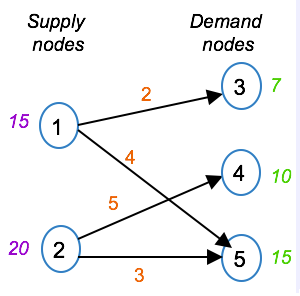

The mathematical model is as follows:

Objective Funcion:
    
    min 2x13 + 4x15 + 5x24 + 3x25

St:

    x13 + x15 <= 15
    x24 + x25 <= 20

    x13 + x23 = 7
    x14 + x24 = 10
    x15 + x25 = 15

    x13 , x15 , x24 , x25 >= 0



In [1]:
import sys
try:
    import cplex
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install cplex
    else:
        !pip install --user cplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43.3 MB 1.4 MB/s 


In [2]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install docplex
    else:
        !pip install --user docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 610 kB 2.1 MB/s 
  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662847 sha256=2819f8afb88fc384144a971181e8a87aab27d0912ccaebcf6ca7eaf5cebb9a21
  Stored in directory: /root/.cache/pip/wheels/a7/c9/fb/cee5a89f304e77a39c466e625ac2830434b76eb8384999d116
Successfully built docplex


In [1]:
from docplex.mp.model import Model
tm = Model(name='Transportation') 

Parameters

In [2]:
capacities = {1:15, 2:20}
demands = {3:7 , 4:10 , 5:15}
costs = {(1,3):2 , (1,5):4 , (2,4):5 , (2,5):3}

source = range(1,3)
target = range(3,6)

Decision Variables

In [3]:
x = {(i,j): tm.continuous_var(name='x_{0}_{1}'.format(i,j)) for i in source for j in target}

Constraints

In [4]:
# Capacity constraints
for i in source:
    tm.add_constraint(tm.sum(x.get((i,j),0) for j in target) <= capacities[i])
    
# Demand constraints
for j in target:
    tm.add_constraint(tm.sum(x.get((i,j),0) for i in source) == demands[j])

Objective Funcion

In [5]:
tm.minimize(tm.sum(x.get((i,j),0)*costs.get((i,j), 0) for i in source for j in target))

tm.print_information()

Model: Transportation
 - number of variables: 6
   - binary=0, integer=0, continuous=6
 - number of constraints: 5
   - linear=5
 - parameters: defaults
 - objective: minimize
 - problem type is: LP


Final Results

In [6]:
tms = tm.solve()
assert tms
tms.display()

solution for: Transportation
objective: 47.000
x_1_4 = 10.000
x_1_5 = 2.000
x_2_3 = 7.000
x_2_5 = 13.000
